In [0]:
#@title Paremeters
N = 1000000 #@param {type:"slider", min:0, max:1000000, step:1}
Xmin=0     #@param {type:"integer"}
Xmax=100   #@param {type:"integer"}

import numpy as np
Nc = np.arange(10, N, 100000)

In [0]:
! rm -rf *
!ls

In [0]:
#@title Default title text

for number in Nc:
    text=f"""
    #include <stdio.h>
    #include <curand.h>
    #include <curand_kernel.h>
    #include <math.h>
    #include <assert.h>
    #include <fstream>
    #include <iostream>
    #include <ctime>
    #define MIN {Xmin}
    #define MAX {Xmax}
    #define ITER {number}"""+"""

    using namespace std;

    __global__ void setup_kernel(curandState *state)
    {

      int idx = threadIdx.x+blockDim.x*blockIdx.x;
      curand_init(1234, idx, 0, &state[idx]);
    }

    __global__ void generate_kernel(curandState *my_curandstate, const unsigned int n, const unsigned *max_rand_int, const unsigned *min_rand_int,  unsigned int *result)
    {

      int idx = threadIdx.x + blockDim.x*blockIdx.x;

      int count = 0;
      while (count < n){
        float myrandf = curand_uniform(my_curandstate+idx);
        myrandf *= (max_rand_int[idx] - min_rand_int[idx]+0.999999);
        myrandf += min_rand_int[idx];
        int myrand = (int)truncf(myrandf);

        assert(myrand <= max_rand_int[idx]);
        assert(myrand >= min_rand_int[idx]);
        result[myrand-min_rand_int[idx]]++;
        count++;}
    }

    int main(){
    cout<<MIN<<" "<<MAX;
    clock_t start, finish;
    start = std::clock();

      curandState *d_state;
      cudaMalloc(&d_state, sizeof(curandState));
      unsigned *d_result, *h_result;
      unsigned *d_max_rand_int, *h_max_rand_int, *d_min_rand_int, *h_min_rand_int;
      cudaMalloc(&d_result, (MAX-MIN+1) * sizeof(unsigned));
      h_result = (unsigned *)malloc((MAX-MIN+1)*sizeof(unsigned));
      cudaMalloc(&d_max_rand_int, sizeof(unsigned));
      h_max_rand_int = (unsigned *)malloc(sizeof(unsigned));
      cudaMalloc(&d_min_rand_int, sizeof(unsigned));
      h_min_rand_int = (unsigned *)malloc(sizeof(unsigned));
      cudaMemset(d_result, 0, (MAX-MIN+1)*sizeof(unsigned));
      setup_kernel<<<1,1>>>(d_state);

      *h_max_rand_int = MAX;
      *h_min_rand_int = MIN;
      cudaMemcpy(d_max_rand_int, h_max_rand_int, sizeof(unsigned), cudaMemcpyHostToDevice);
      cudaMemcpy(d_min_rand_int, h_min_rand_int, sizeof(unsigned), cudaMemcpyHostToDevice);
      generate_kernel<<<1,1>>>(d_state, ITER, d_max_rand_int, d_min_rand_int, d_result);
      cudaMemcpy(h_result, d_result, (MAX-MIN+1) * sizeof(unsigned), cudaMemcpyDeviceToHost);

     finish = std::clock();

      ofstream myfile;
      myfile.open ("example.txt");
      for (int i = MIN; i <= MAX; i++)
          myfile << h_result[i-MIN] <<" ";
      myfile.close();

      ofstream myfile2;
      myfile2.open ("time.txt",ios::app);
    
       myfile2 << (finish - start)/ (double) CLOCKS_PER_SEC <<" ";
       myfile2.close();
      return 0;

    }
    """

# write text in file t527.cu

    path = "tcuda"+str(number)+".cu"
    file = open(path,'w')
    file.write(text)
    file.close()

#visualise file
#!cat tcuda100000.cu
#!nvcc -o t527 t527.cu -lcurand
#!cuda-memcheck ./t527

In [0]:
for number in Nc:
      text2 = f"""
      #include <iostream>
      #include <random>
      #include <stdio.h>
      #include <math.h>
      #include <assert.h>
      #include <fstream>
      #include <ctime>



      #define MIN {Xmin}
      #define MAX {Xmax}
      #define ITER {number}"""+"""

      int main()
      {

      std::cout<<MIN<<" "<<MAX;
      clock_t start, finish;
      start = std::clock();

          //std::cout<<MIN<<" "<<MAX;
          std::random_device rd; // obtain a random number from hardware
          std::mt19937 eng(rd()); // seed the generator
          std::uniform_int_distribution<> distr(MIN, MAX); // define the range



          unsigned long buff;
          unsigned long k[MAX-MIN];

          for(int n=MIN; n<MAX; ++n)
            k[n]=0;

          for(int n=0; n<ITER; ++n){
              k[distr(eng)-MIN]++;
          }

      finish = std::clock();

          std::ofstream myfile;
          myfile.open ("example2.txt");
          for(int n=MIN; n<MAX ; n++)
          {
             myfile << k[n-MIN] <<" ";
             //std::cout<<k[n-MIN] <<" ";
          }    
           myfile.close();

           std::ofstream myfile2;
           myfile2.open("time2.txt", std::ios::app);
           myfile2 << (finish - start)/ (double) CLOCKS_PER_SEC <<" ";
           myfile2.close();

           return 0;

      }
      """

      path = "treg"+str(number)+".cpp"
      file = open(path,'w')
      file.write(text2)
      file.close()
      #visualise file
      #!cat t527.cu
      #!nvcc -o t527 t527.cu -lcurand
      #!cuda-memcheck ./t527



In [0]:
!ls

tcuda100010.cu	tcuda400010.cu	tcuda800010.cu	treg200010.cpp	treg600010.cpp
tcuda10.cu	tcuda500010.cu	tcuda900010.cu	treg300010.cpp	treg700010.cpp
tcuda200010.cu	tcuda600010.cu	treg100010.cpp	treg400010.cpp	treg800010.cpp
tcuda300010.cu	tcuda700010.cu	treg10.cpp	treg500010.cpp	treg900010.cpp


SM30 or **SM_30,** compute_30 – Kepler architecture (generic – **Tesla K40/K80**, GeForce 700, GT-730)

In [0]:
for number in Nc:
    path="tcuda"+str(number)+".cu"
    debug="exeCuda"+str(number)
    !nvcc -arch=sm_30 $path  -o  $debug
    !./$debug
    print(path)

0 100tcuda10.cu
0 100tcuda100010.cu
0 100tcuda200010.cu
0 100tcuda300010.cu
0 100tcuda400010.cu
0 100tcuda500010.cu
0 100tcuda600010.cu
0 100tcuda700010.cu
0 100tcuda800010.cu
0 100tcuda900010.cu


In [0]:
for number in Nc:
    path="treg"+str(number)+".cpp"
    debug="exeReg"+str(number)
    !g++ $path -o $debug
    !./$debug
    print(path)

0 100treg10.cpp
treg100010.cpp
treg200010.cpp
treg300010.cpp
treg400010.cpp
treg500010.cpp
treg600010.cpp
treg700010.cpp
treg800010.cpp
treg900010.cpp


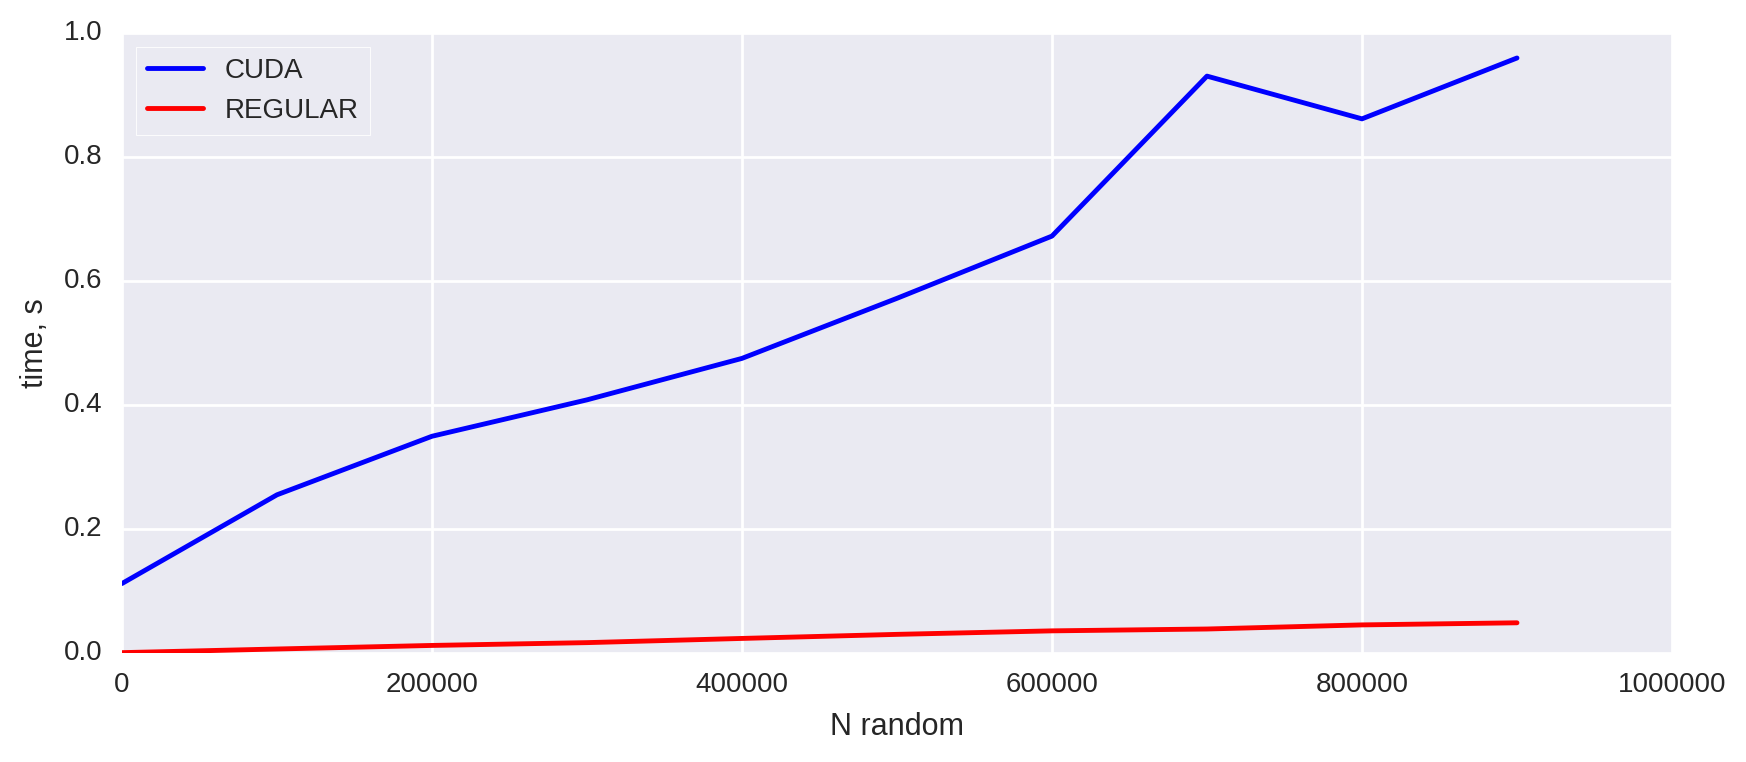

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'retina'

plt.style.use(['seaborn'])

with open('example.txt') as f:
    array = []
    for line in f: # read rest of lines
        array.append([int(x) for x in line.split()])


with open('time.txt') as f:
    time = []
    for line in f: # read rest of lines
        time.append([float(x) for x in line.split()])


with open('example2.txt') as f:
    array2 = []
    for line in f: # read rest of lines
        array2.append([int(x) for x in line.split()])


with open('time2.txt') as f:
    time2 = []
    for line in f: # read rest of lines
        time2.append([float(x) for x in line.split()])
  

plt.figure(figsize=(10, 4), dpi=100, facecolor='w', edgecolor='k')
# plt.ylim(min(time[0])*0.5, max(time[0])*1.5)

# plt.title("N=" + str(N) + "      x["+ str(Xmin)+ "; " + str(Xmax)+"]     Tcuda="+ str(time[0][0])+"s "+"T="+str(time2[0][0])+"s " )
line_cuda, =plt.plot( Nc, time[0], label='CUDA',color='b' )
line_regular, = plt.plot( Nc, time2[0], label='REGULAR',color='r')

plt.xlabel("N random")
plt.ylabel("time, s")

plt.legend(handles=[line_cuda, line_regular], loc=2, frameon=True);




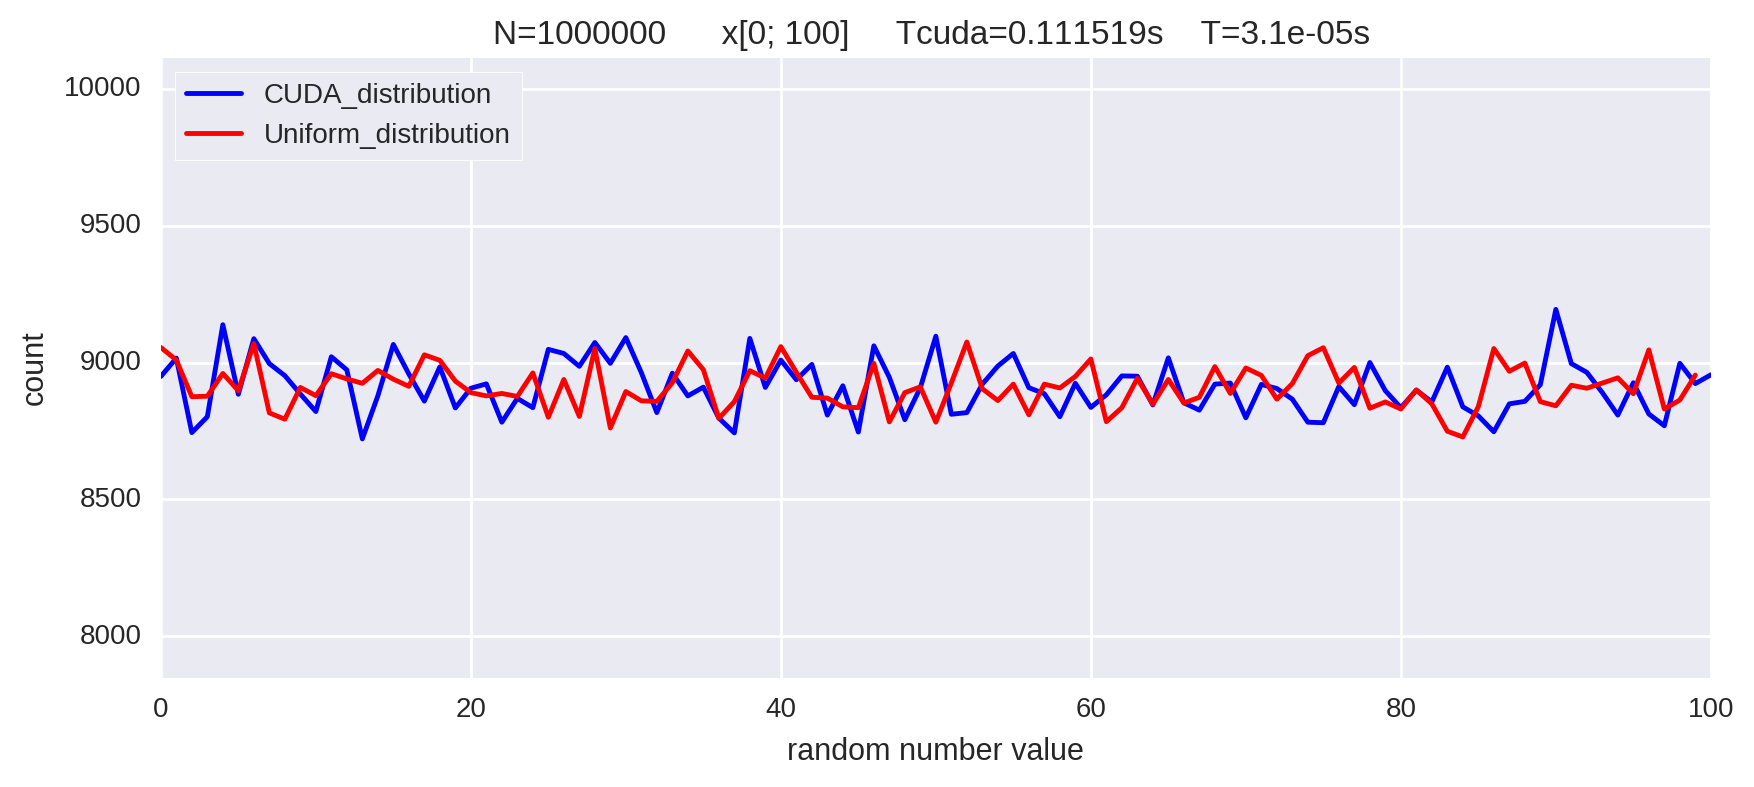

In [0]:
plt.figure(figsize=(10, 4), dpi=100, facecolor='w', edgecolor='b')        
line_cuda,=plt.plot( array[0],color='b', label='CUDA_distribution' )
line_regular,=plt.plot( array2[0], color='r', label='Uniform_distribution')

plt.ylim(min(array[0])*0.9, max(array[0])*1.1)
plt.title("N=" + str(N) + "      x["+ str(Xmin)+ "; " + str(Xmax)+"]     Tcuda="+ str(time[0][0])+"s    "+"T="+str(time2[0][0])+"s " )
plt.xlabel("random number value")
plt.ylabel("count")
plt.legend(handles=[line_cuda, line_regular], loc=2, frameon=True);